<a href="https://colab.research.google.com/github/Hrayyan/Business-Case-Walmart---Confidence-Interval-and-CLT/blob/main/Walmart_CI_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

*   The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/walmart2.txt")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


**INFERENCES UP TILL HERE**

(I)-There are 3631 unique product sold by walmart as per the dataset in which P00265242 has the highest sale, apart from it 5891 unique users are there in which user with id 1001680 have the highest purchase.

(II)- Among the 7 different age groups most of the purchase is done by the customers from age 26 to 35.

(III)- Since the Max and Min Purchase done by customers is 12 and 23961 which shows that wallmart customers base is diversified in terms of purchase hence we can conclude that each type of customer is being catered which is a good point

(IV)- 75% of the customers are the one who have the buying capacity uptill 12000 , hence planning to retain those customers has to be done accordingly which means that most of the price has to be kept affordable.

(V)- Males have a far more domination then females in terms of purchase count.

(VI)- Unmarried peoples contribute most to the sales


In [ ]:
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
(df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df))*100  # variable & value these names cannot be changed

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

In [ ]:
df2=df.groupby(['User_ID'])['Age'].unique()   #categorical columns
(df2.value_counts()/len(df2))*100

[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: Age, dtype: float64

    INFERENCE- Almost 35% of the users are aged between 26-35 and are contributing
     40% in total purchase share.

In [ ]:
df2=df.groupby(['User_ID'])['Gender'].unique()   #categorical columns
(df2.value_counts()/len(df2))*100

[M]    71.719572
[F]    28.280428
Name: Gender, dtype: float64

INFERENCE- Almost 72% Male users are there which are contributing upto
75% in total purchase share

In [ ]:
df2=df.groupby(['User_ID'])['Marital_Status'].unique()   #categorical columns
(df2.value_counts()/len(df2))*100

[0]    58.003735
[1]    41.996265
Name: Marital_Status, dtype: float64

In [ ]:
df2=df.groupby(['User_ID'])['City_Category'].unique()    #categorical columns
(df2.value_counts()/len(df2))*100

[C]    53.284672
[B]    28.976405
[A]    17.738924
Name: City_Category, dtype: float64

INFERENCE- 53% of the users belong to city category C While contributing 31% in Total Purchase share on the other hand 29% of users belongs to city category B and the contribution Done by them is quite significat then that of C i.e 42% and apart from it about 18% users belong to category A contributing to 26% in purchase share


In [ ]:
pd.crosstab(index=df["City_Category"], columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


    INFERENCE- As we have seen above that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results that almost 40% of customers are aged 26-35 for B and about 50% for A which can be the reason for these city categories having more overall purchase

In [ ]:
df2=df.groupby(['Gender'])[['Purchase']].sum()              #Purchase is a numerical column
df2['percentage contribution'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percentage contribution
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


NOTE: Contrary to the above observation we find out here that 72% males are contributing to almost 77% of purchase


In [ ]:
df2=df.groupby(['Age'])[['Purchase']].sum()

df2['%age contribution'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,%age contribution
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


In [ ]:
df2=df.groupby(['Marital_Status'])[['Purchase']].sum()

df2['%age contribution'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,%age contribution
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


In [ ]:
df2=df.groupby(['City_Category'])[['Purchase']].sum()

df2['%age contribution'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,%age contribution
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


In [ ]:
# Users with highest number of purchases
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [ ]:
#Users with highest purchases amount
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

INFERENCE:

Important observation here is that the among top 10 people in terms of purchase amount some are there which do not have any place in the top 10 list of the purchase count it shows that they are buying less but costly products, apart from it we can notice that the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680)

In [ ]:
df2=df.groupby(['Occupation'])[['Purchase']].sum()

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


INFERENCE: People with occupation 0,4 and 7 have a significant contribution in the purcgase amount

In [ ]:
df2=df.groupby(['Product_Category'])[['Purchase']].sum()

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


INFERENCE: Product having categories 1,5 and 8 are among the best performing product with the highest sales

In [ ]:
df2=df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum()

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


**UNIVARIATE ANALYSIS**

-> Lets see the distribution of data for quantative attribute (PURCHASE)

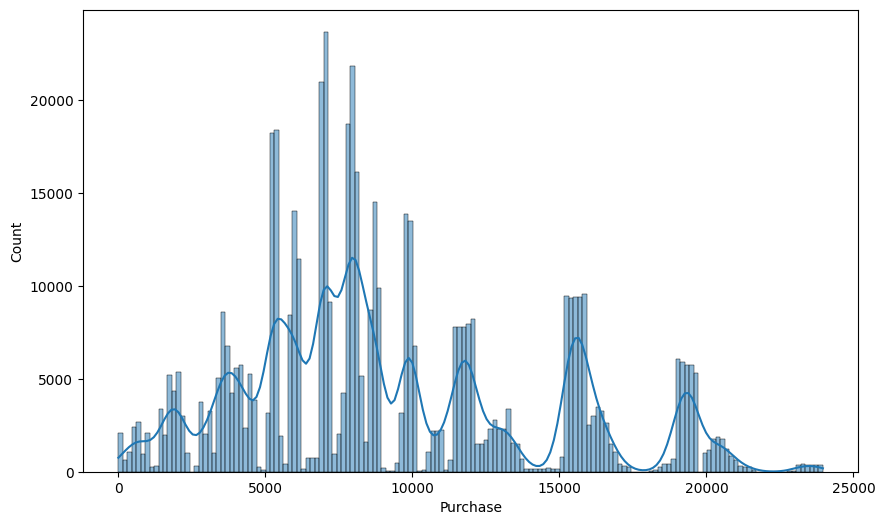

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

INFERENCE:
The highest count of purchase is within the purchase value of 5000 to 10000

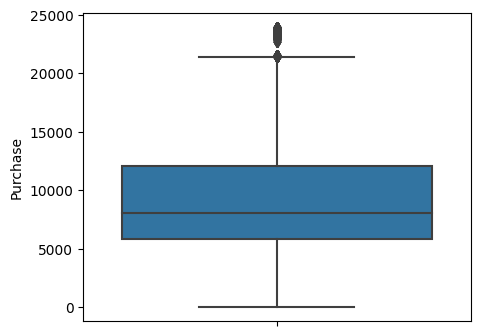

In [ ]:
plt.figure(figsize=(5, 4))             # detecting outliers in the purchase column
sns.boxplot(data=df, y='Purchase')
plt.show()

-> Distribution of data for Qualitative attributes

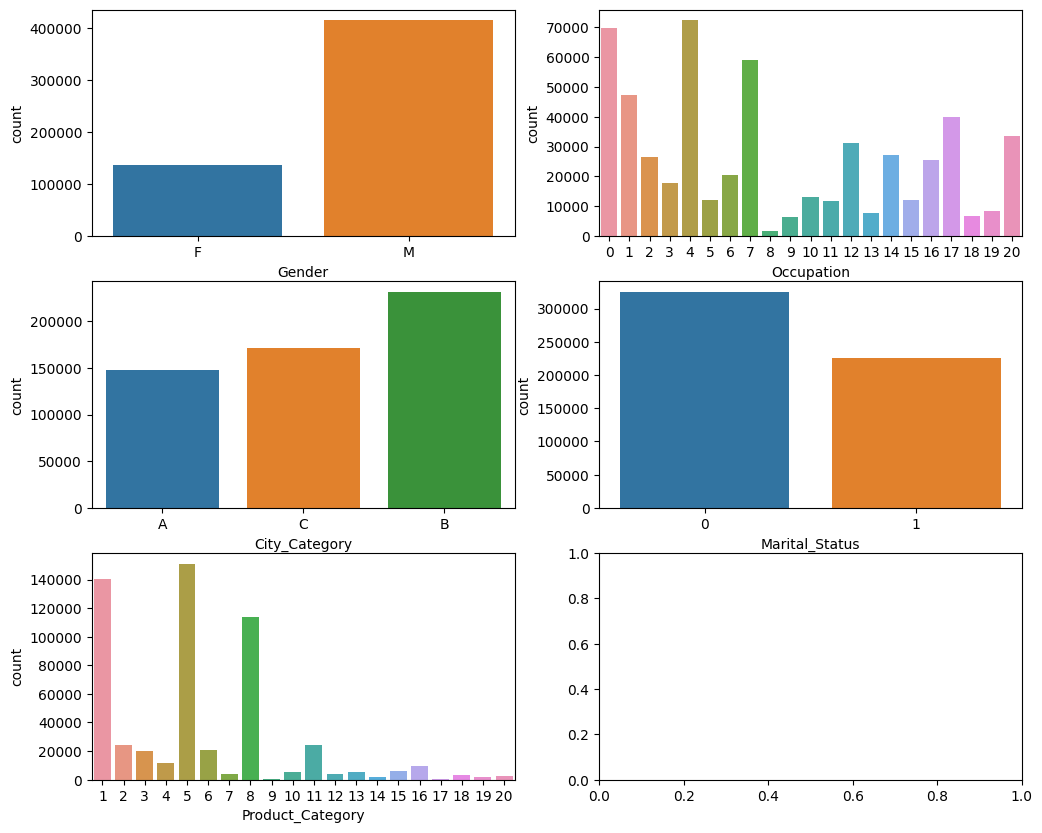

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
sns.countplot(data=df, x='Product_Category', ax=axs[2,0])
plt.show()

This is the graphical representation of all the inferences we have fetched above

**BIVARIATE ANALYSIS**

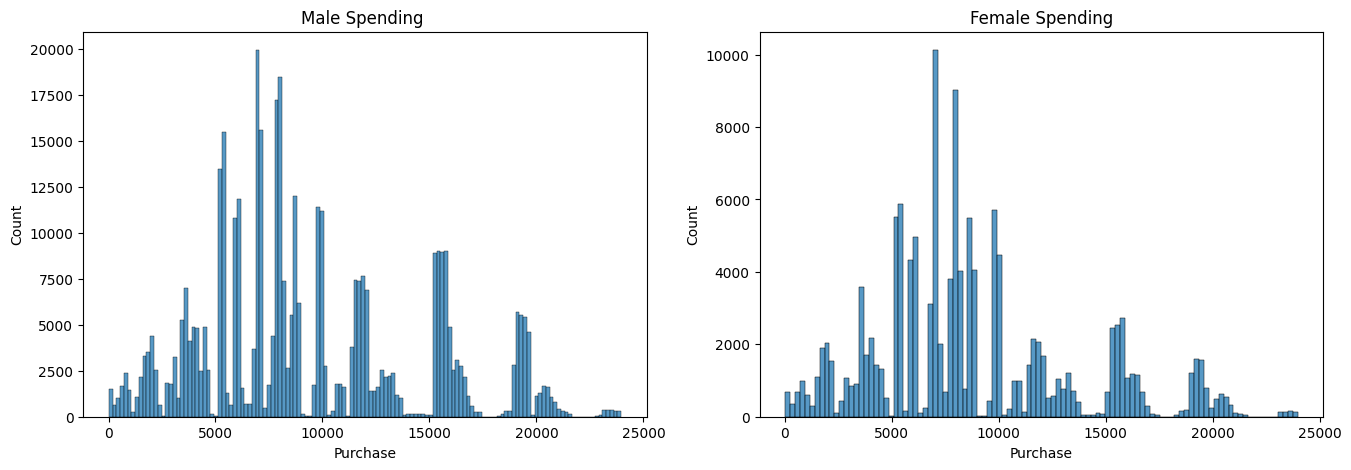

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

INFERENCE: Spending pattern is almost same for both males and females i.e most of the peoples are are spending within the purchase amount of 5000 to 10,000 but the count is almost double for males then females

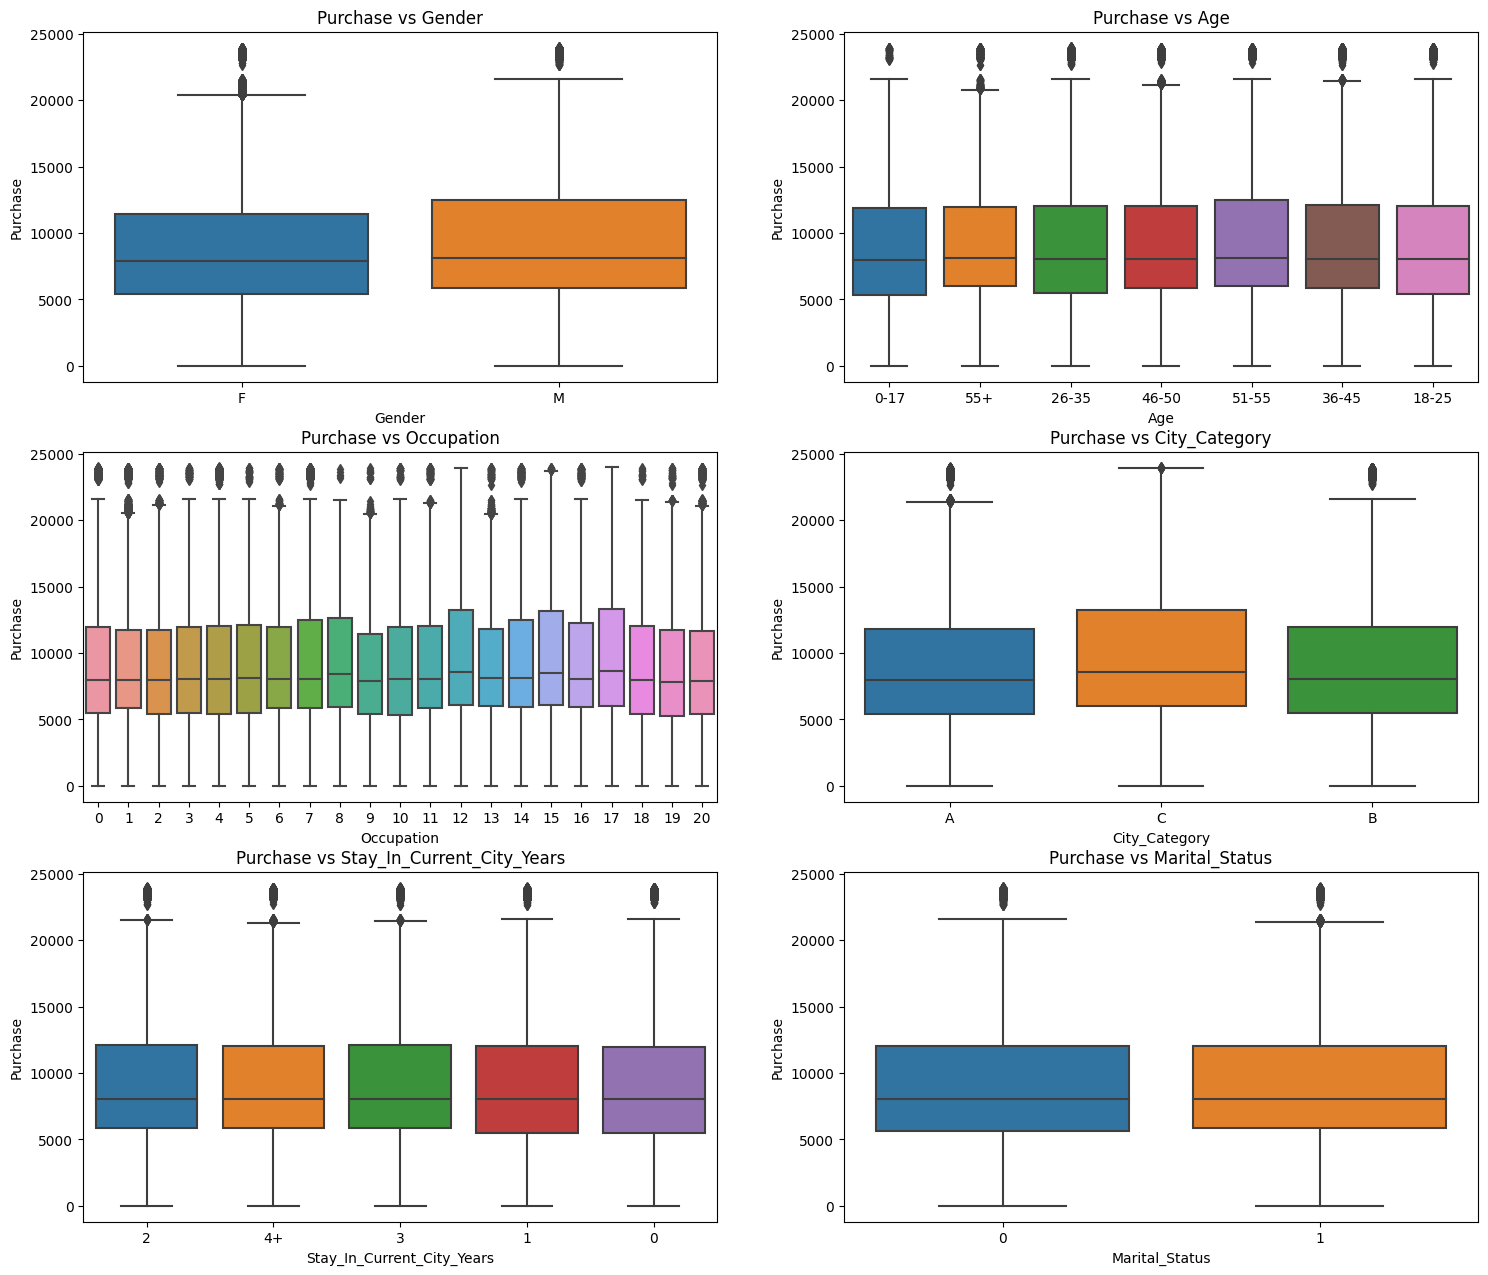

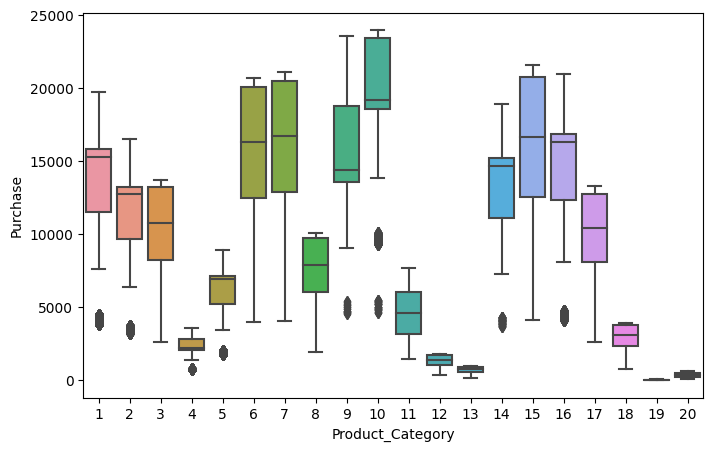

In [ ]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.show()

INFERENCE
    
    1. The spending behaviour for males and females are almost similar as we had seen from the above histplot. Males purchasing value are little bit higher than females.
    2. Among differnt age categories Also, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
    3. Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
    4. Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
    5. We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.

**MULTIVARIATE ANALYSIS**

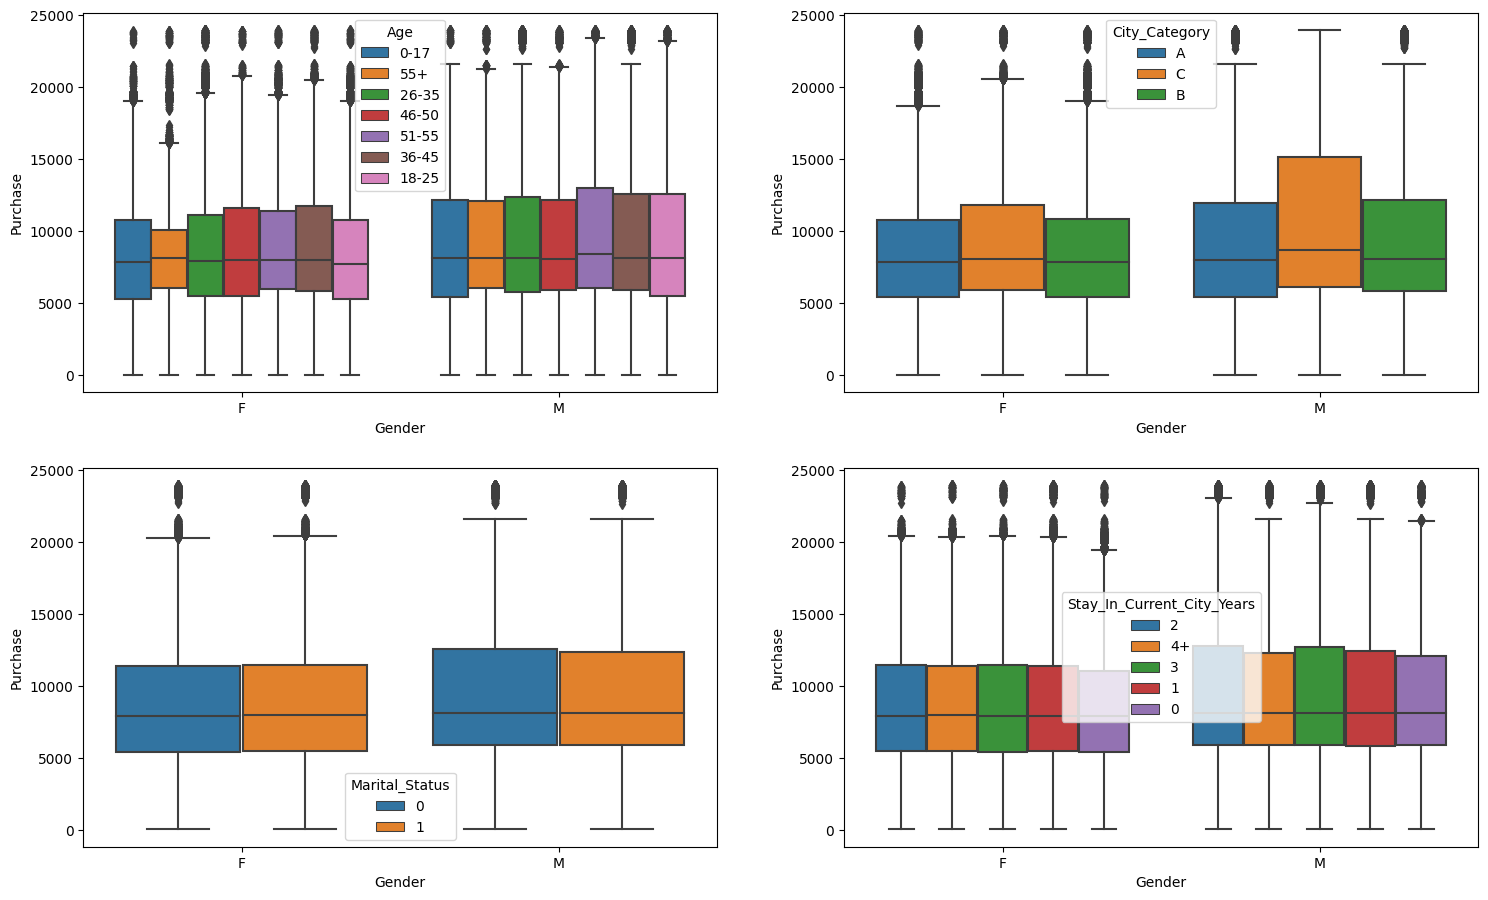

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

INFERENCE:
        
    1. The purchasing pattern is very much similar for males and females even among differnt age groups.
    2. The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.
    3. Males and females spending behaviour remains similar even when take into account their marital status.
    4. Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

<ipython-input-7-bb4610a23092>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Greens", linewidth=.5)


<Axes: >

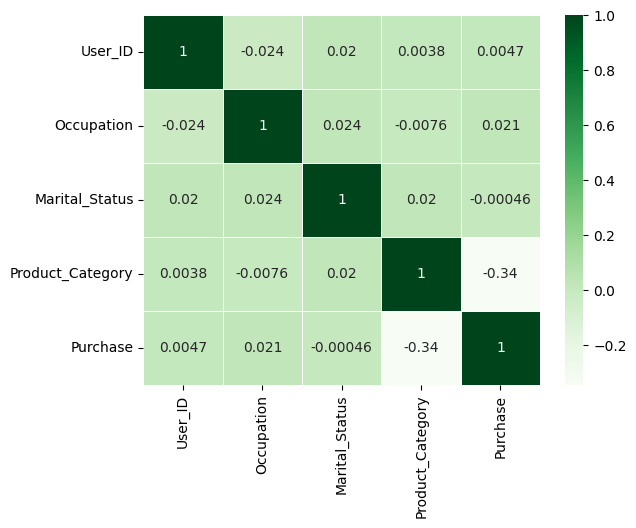

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Greens", linewidth=.5)

In [ ]:
avg_amt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
avg_amt_gender  # AVG amount spent per males and females

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
avg_amt_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Text(0.5, 1.0, 'avg amt spent by Males')

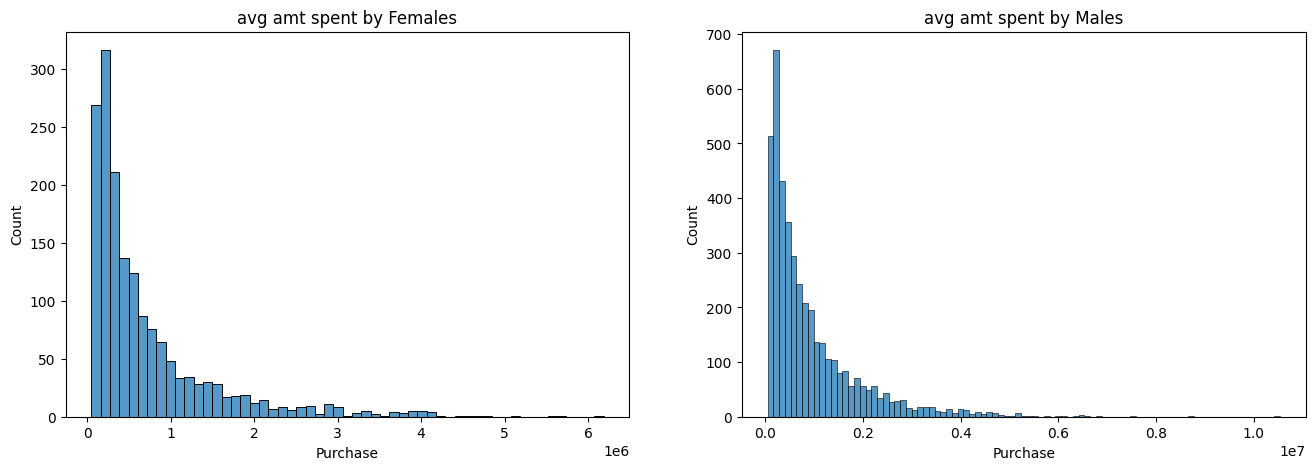

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=avg_amt_gender[avg_amt_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("avg amt spent by Females")
sns.histplot(data=avg_amt_gender[avg_amt_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("avg amt spent by Males")

In [ ]:
avg_amt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
avg_amt_gender.groupby(['Gender'])['Purchase'].sum()


Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [ ]:
avg_amt_male = avg_amt_gender[avg_amt_gender['Gender']=='M']
avg_amt_female = avg_amt_gender[avg_amt_gender['Gender']=='F']

In [ ]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

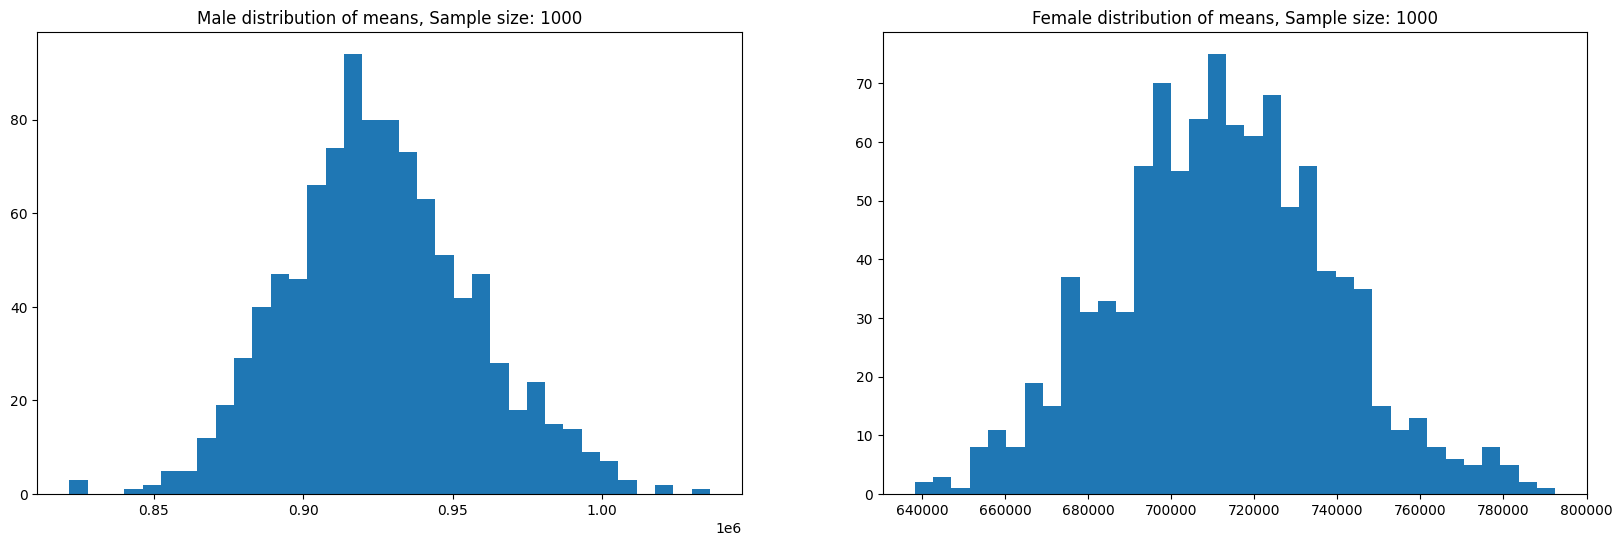

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

Calculating 90% confidence interval for sample size 1000:

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval
#The .2f inside the curly braces specifies that the value should be formatted as a float with two decimal places.
print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925857.95
Sample avg spend amount for Female: 712251.06

Sample std for Male: 31300.15
Sample std for Female: 26214.29

Sample std error for Male: 989.80
Sample std error for Female: 828.97

Male_CI:  [924229.7308576624, 927486.1649943376]
Female_CI:  [710887.4031239168, 713614.7094300834]


INFERENCE:

Now using the Confidence interval at 90%, we can say that:

Average amount spend by male customers lie in the range 9,22,940.71 - 9,26,225.18

Average amount spend by female customers lie in range 7,10,425.64 - 7,13,064.55

Calculating 95% confidence interval for sample size 1000:

In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925857.95
Sample avg spend amount for Female: 712251.06

Sample std for Male: 31300.15
Sample std for Female: 26214.29

Sample std error for Male: 989.80
Sample std error for Female: 828.97

Male_CI:  [923917.9446105339, 927797.9512414661]
Female_CI:  [710626.2780520498, 713875.8345019504]


INFERENCE:

Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range 9,22,626.24 - 9,26,539.65

Average amount spend by female customers lie in range 7,10,172.98 - 7,13,317.21


Calculating 99% confidence interval for sample size 1000:



In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925857.95
Sample avg spend amount for Female: 712251.06

Sample std for Male: 31300.15
Sample std for Female: 26214.29

Sample std error for Male: 989.80
Sample std error for Female: 828.97

Male_CI:  [923308.229282816, 928407.6665691839]
Female_CI:  [710115.6334670655, 714386.4790869347]


Now using the Confidence interval at 99%, we can say that:

Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61

Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31

Calculating 90% confidence interval for sample size 1500:

In [ ]:
#Finding the sample(sample size=1000) avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924743.37
Sample avg spend amount for Female: 712735.41

Sample std for Male: 24719.51
Sample std for Female: 20947.12

Sample std error for Male: 638.25
Sample std error for Female: 540.85

Male_CI:  [923693.4370852273, 925793.2956987727]
Female_CI:  [711845.7061587631, 713625.1103225701]


Now using the Confidence interval at 90%, we can say that:

Average amount spend by male customers lie in the range 9,24,177.41 - 9,26,318.90

Average amount spend by female customers lie in range 7,11,187.27 - 7,12,971.67

By increasing the sample size we can see confidence interval is more closer to the population mean.

Calculating 95% confidence interval for sample size 1500:

In [ ]:
print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924743.37
Sample avg spend amount for Female: 712735.41

Sample std for Male: 24719.51
Sample std for Female: 20947.12

Sample std error for Male: 638.25
Sample std error for Female: 540.85

Male_CI:  [923492.3867924411, 925994.3459915589]
Female_CI:  [711675.3376749945, 713795.4788063387]


Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range 9,23,972.41 - 9,26,523.93

Average amount spend by female customers lie in range 7,11,016.42 - 7,13,142.51

By increasing the sample size we can see confidence interval is more closer to the population mean.

Calculating 99% confidence interval for sample size 1500:

In [ ]:
print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924743.37
Sample avg spend amount for Female: 712735.41

Sample std for Male: 24719.51
Sample std for Female: 20947.12

Sample std error for Male: 638.25
Sample std error for Female: 540.85

Male_CI:  [923099.2217754369, 926387.5110085631]
Female_CI:  [711342.1726400689, 714128.6438412643]


Now using the Confidence interval at 99%, we can say that:

Average amount spend by male customers lie in the range 923571.42 - 926924.89

Average amount spend by female customers lie in range 710682.32 - 713476.61

By increasing the sample size we can see confidence interval is more closer to the population mean.


CLT and Confidence interval considering marital status:

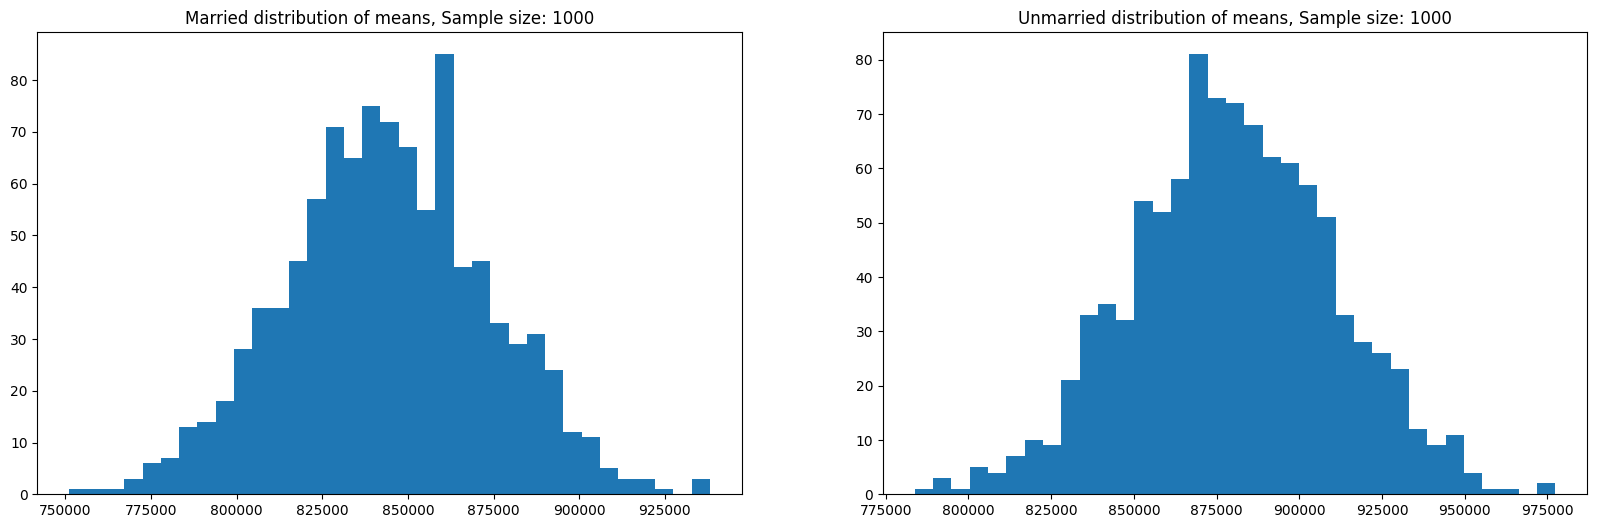

In [ ]:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avgamt_married = avg_Marital[avg_Marital['Marital_Status']==1]
avgamt_single = avg_Marital[avg_Marital['Marital_Status']==0]

sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(single_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z90*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z90*sample_std_error_married

Upper_Limit_single=z90*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z90*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843890.22
Sample avg spend amount for Single: 878867.84

Sample std for Married: 29955.00
Sample std for Single: 28942.65

Sample std error for Married: 947.26
Sample std error for Single: 915.25

Married_CI:  [842331.9789748051, 844940.1512397728]
Single_CI:  [877362.2625458596, 880373.4250881405]



Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval
print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z95*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 844050.02
Sample avg spend amount for Single: 879864.64

Sample std for Married: 29485.21
Sample std for Single: 30557.05

Sample std error for Married: 932.40
Sample std error for Single: 966.30

Married_CI:  [842222.5062046851, 845300.9983035589]
Single_CI:  [877970.6923579553, 881758.5834740447]


Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000)))
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z99*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single=z99*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 844050.02
Sample avg spend amount for Single: 879864.64

Sample std for Married: 29485.21
Sample std for Single: 30557.05

Sample std error for Married: 932.40
Sample std error for Single: 966.30

Married_CI:  [841648.1451334718, 845694.1633205632]
Single_CI:  [877375.4523254269, 882353.8235065731]


    For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.

In [ ]:
avg_amt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_amt_age = avg_amt_age.reset_index()

avg_amt_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

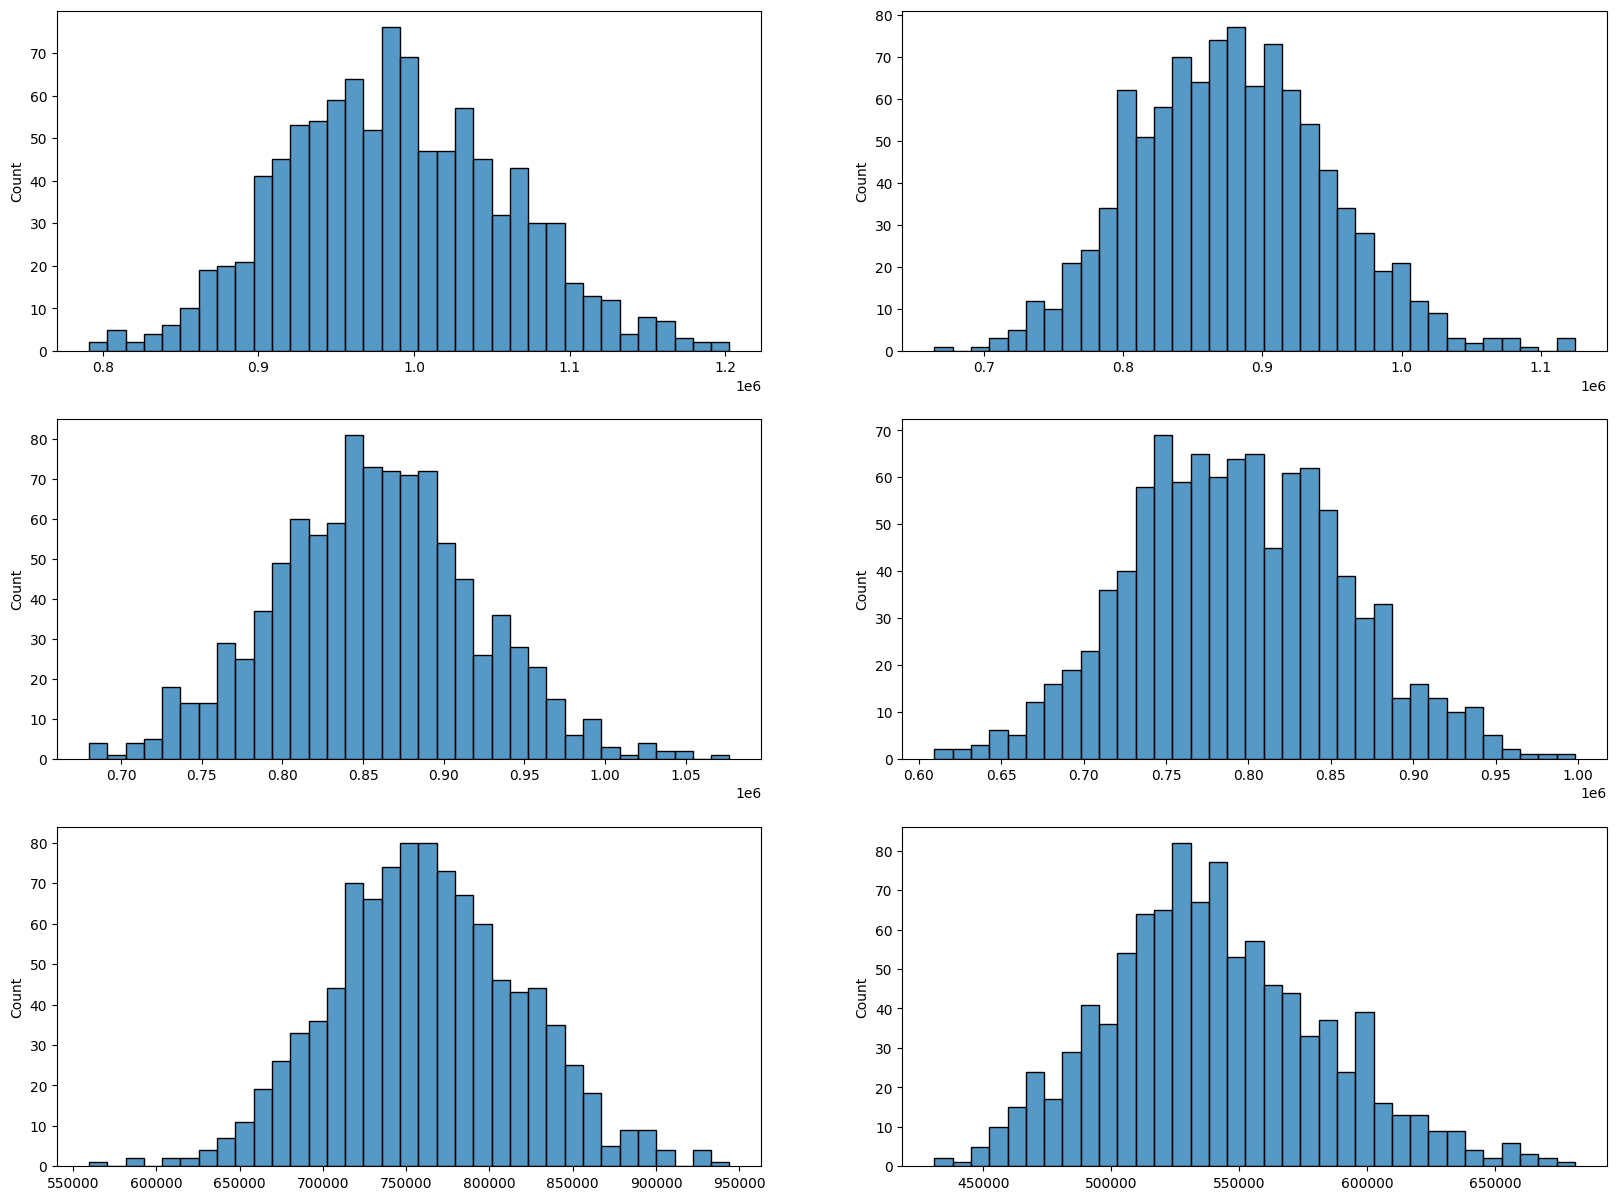

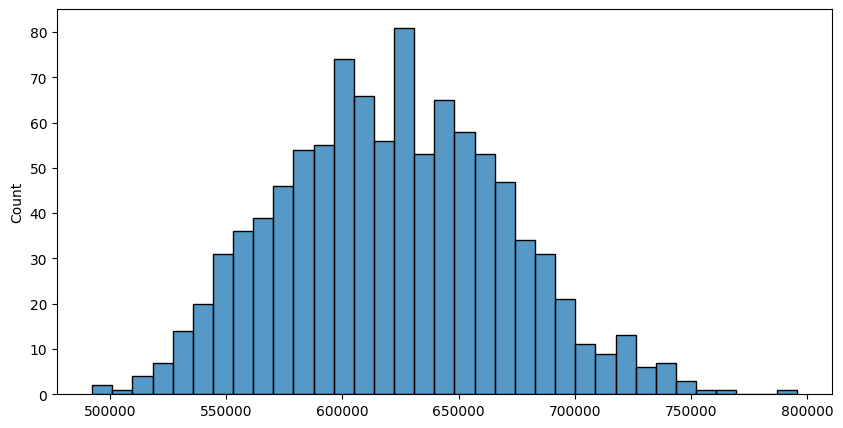

In [ ]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avg_amt_age[avg_amt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.


Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:

In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avg_amt_age[avg_amt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = avg_amt_age[avg_amt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_age[avg_amt_age['Age']==val]

    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avg_amt_age[avg_amt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_age[avg_amt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avg_amt_age[avg_amt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_age[avg_amt_age['Age']==val]

    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


**RECOMMENDATIONS**

*   Acknowledging the significant impact male patrons wield on Black Friday sales, Walmart can enhance its marketing tactics and product lineup to stimulate higher spending from this demographic. By crafting tailored strategies and ensuring competitive pricing across female-targeted merchandise, Walmart can optimize its appeal to male shoppers and drive greater transactional value

*   Recognizing the pivotal role played by the 26 - 45 age bracket in driving sales, Walmart should prioritize catering to the preferences and requirements of this consumer segment. By offering bespoke deals on products favored by individuals within this age range, Walmart can fortify its appeal and entice greater patronage.
*   Acknowledging the comparatively lower spending patterns of customers aged 0 - 17, Walmart can explore avenues to bolster their transactional value through enticing discounts, coupons, or rewards programs. By fostering brand loyalty among younger shoppers, Walmart can cultivate enduring relationships and stimulate long-term value.


*   Given the analogous purchasing behaviors observed among consumers aged 18 - 25, 26 - 35, and 46 - 50, as well as among those in the 36 - 45 and 55+ cohorts, Walmart can optimize its product assortment to align with the unique preferences of each demographic. Additionally, leveraging this insight, Walmart can tailor its pricing strategies to resonate effectively with diverse age groups.

*  Following the conclusion of Black Friday, Walmart should actively engage with patrons through targeted follow-up communications or enticing offers on complementary products. This proactive approach can augment customer retention and stimulate repeat transactions, thereby sustaining momentum throughout the festive season and beyond.




